In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
from datetime import datetime
import seaborn as sns

In [9]:
data2005_2007 = pd.read_csv('data/accidents_2005_to_2007.csv', na_values=['NULL'], low_memory = False) 
data2009_2011 = pd.read_csv('data/accidents_2009_to_2011.csv', na_values=['NULL'], low_memory = False) 
data2012_2014 = pd.read_csv('data/accidents_2012_to_2014.csv', na_values=['NULL'], low_memory = False) 
dataAADF = pd.read_csv('data/ukTrafficAADF.csv', na_values=['NULL'], low_memory = False)
#combine data from 2005 - 2014
data = pd.concat([data2005_2007, data2009_2011, data2012_2014])

In [10]:
print(data['Time'].isnull().sum() / len(data['Time']))
print(data['Weather_Conditions'].isnull().sum() / len(data['Weather_Conditions']))
data = data.dropna(subset = ['Time'])
data = data.dropna(subset = ['Weather_Conditions'])

7.7784795399395e-05
8.376824119934847e-05


In [11]:
#change the format of data['Date'] into datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
#add 'month' & 'day' variable
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
#add 'hour' variable
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.hour.astype('int')

Text(0.5,1,'Heatmap of Accidents happened in the UK by month')

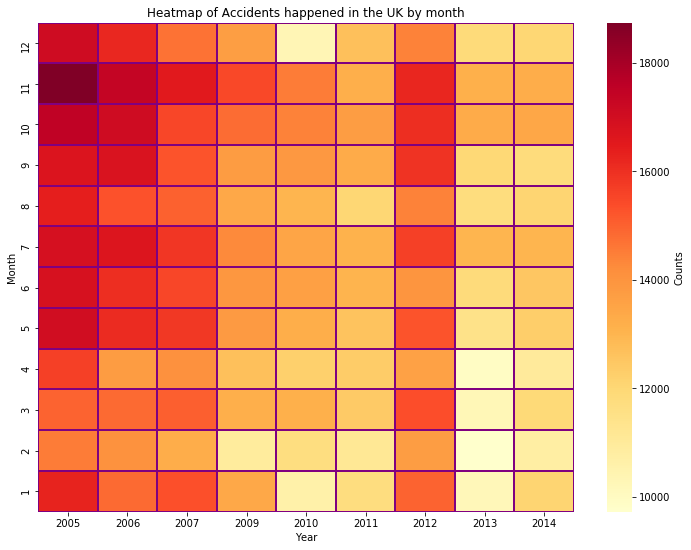

In [32]:
plt.figure(figsize=(12,9))
dftest1 = pd.DataFrame(data, columns=['Year','Month','Accident_Index'])
test1 = dftest1.groupby(['Year', 'Month'])['Accident_Index'].count().to_frame().reset_index()
pt1 = test1.pivot(index = 'Month', columns = 'Year', values = 'Accident_Index')
pt1 = pt1.sort_index(ascending=False)
h1 = sns.heatmap(pt1, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h1.set_title('Heatmap of Accidents happened in the UK by month')
#figh1 = h1.get_figure()
#figh1.savefig('Heatmap of Accidents happened in the UK by month.png')

Text(0.5,1,'Heatmap of Accidents happened in the UK by Hourly')

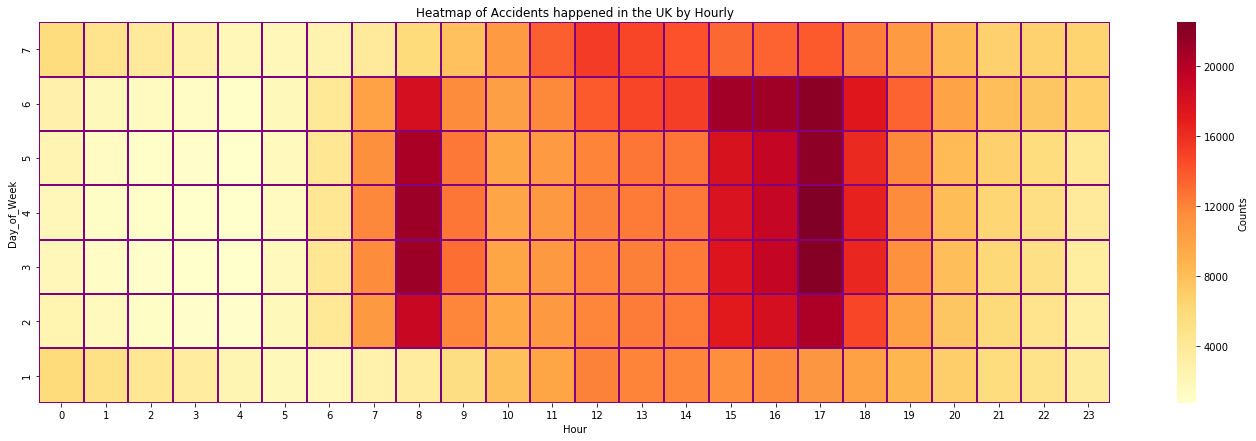

In [39]:
plt.figure(figsize=(24,7))
dftest2 = pd.DataFrame(data, columns=['Day_of_Week','Hour','Accident_Index'])
test2 = dftest2.groupby(['Day_of_Week', 'Hour'])['Accident_Index'].count().to_frame().reset_index()
pt2 = test2.pivot(index = 'Day_of_Week', columns = 'Hour', values = 'Accident_Index')
pt2 = pt.sort_index(ascending=False)
h2 = sns.heatmap(pt2, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h2.set_title('Heatmap of Accidents happened in the UK by Hourly')
#figh2 = h2.get_figure()
#figh2.savefig('Heatmap of Accidents happened in the UK by Hourly.png')

Text(0.5,1,'Heatmap of the Number of Police Force in Accident by Hourly')

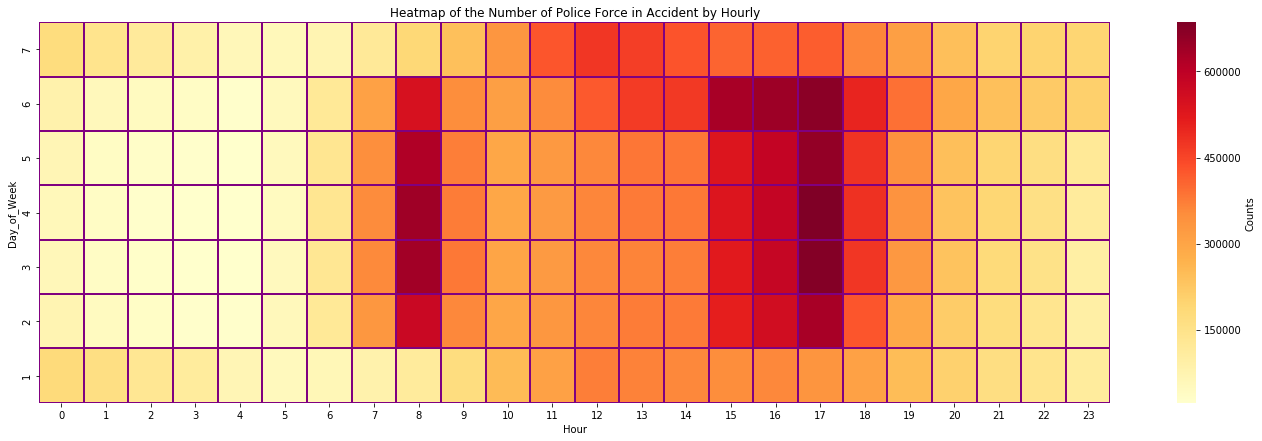

In [37]:
plt.figure(figsize=(24,7))
dftest3 = pd.DataFrame(data, columns=['Day_of_Week','Hour','Police_Force'])
test3 = dftest3.groupby(['Day_of_Week', 'Hour'])['Police_Force'].sum().to_frame().reset_index()
pt3 = test3.pivot(index = 'Day_of_Week', columns = 'Hour', values = 'Police_Force')
pt3 = pt3.sort_index(ascending=False)
h3 = sns.heatmap(pt3, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h3.set_title('Heatmap of the Number of Police Force in Accident by Hourly')
#figh3 = h3.get_figure()
#figh3.savefig('Heatmap of the Number of Police Force in Accident by Hourly.png')

Text(0.5,1,'Heatmap of the Number of Casualties in Accident by Hourly')

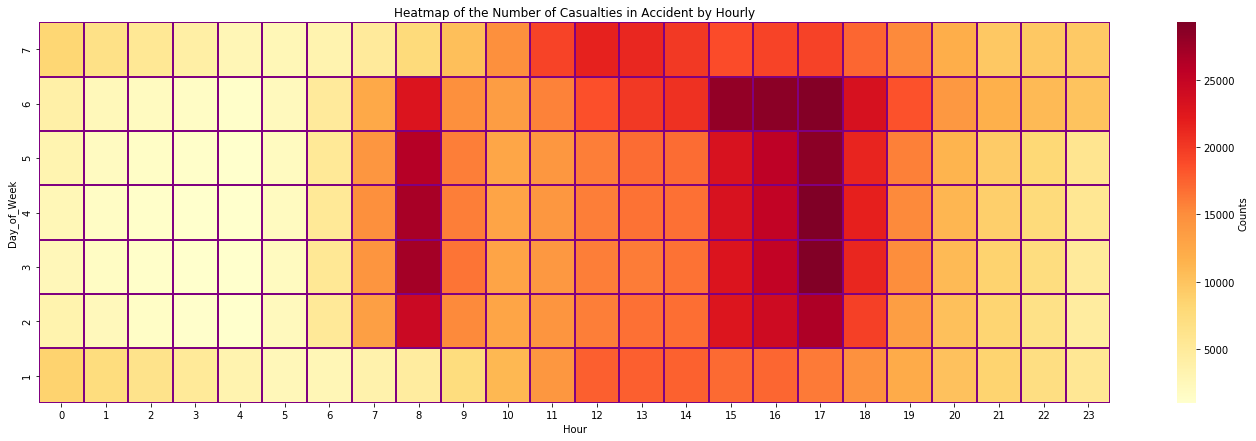

In [36]:
plt.figure(figsize=(24,7))
dftest4 = pd.DataFrame(data, columns=['Day_of_Week','Hour','Number_of_Casualties'])
test4 = dftest4.groupby(['Day_of_Week', 'Hour'])['Number_of_Casualties'].sum().to_frame().reset_index()
pt4 = test4.pivot(index = 'Day_of_Week', columns = 'Hour', values = 'Number_of_Casualties')
pt4 = pt4.sort_index(ascending=False)
h4 = sns.heatmap(pt4, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h4.set_title('Heatmap of the Number of Casualties in Accident by Hourly')
#figh4 = h4.get_figure()
#figh4.savefig('Heatmap of the Number of Casualties in Accident by Hourly.png')

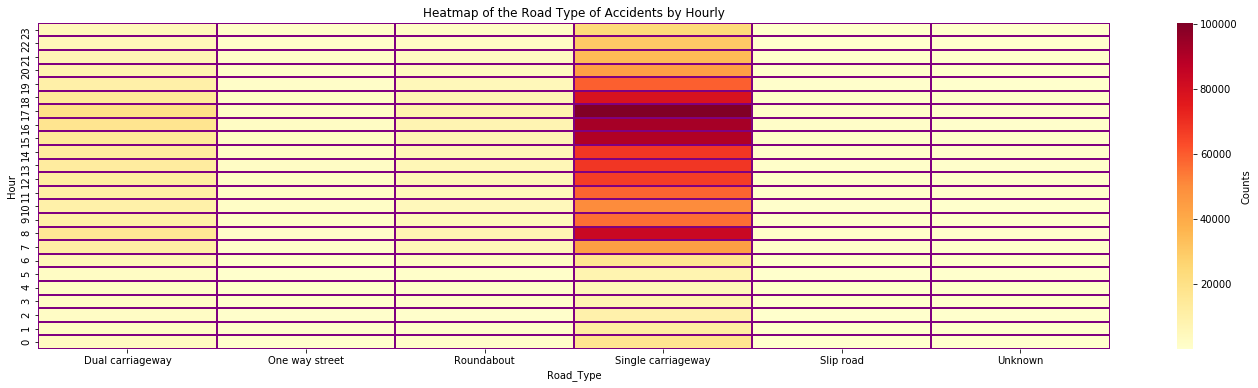

In [38]:
plt.figure(figsize=(24,6))
dftest5 = pd.DataFrame(data, columns=['Hour','Road_Type','Accident_Index'])
test5 = dftest5.groupby(['Hour', 'Road_Type'])['Accident_Index'].count().to_frame().reset_index()
pt5 = test5.pivot(index = 'Hour', columns = 'Road_Type', values = 'Accident_Index')
pt5 = pt5.sort_index(ascending=False)
h5 = sns.heatmap(pt5, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h5.set_title('Heatmap of the Road Type of Accidents by Hourly')
#figh5 = h5.get_ffigure()
#figh5.savefig('Heatmap of Road Type of Accidents.png')

Text(0.5,1,'Heatmap of the Light Conditions of Accidents by Hourly')

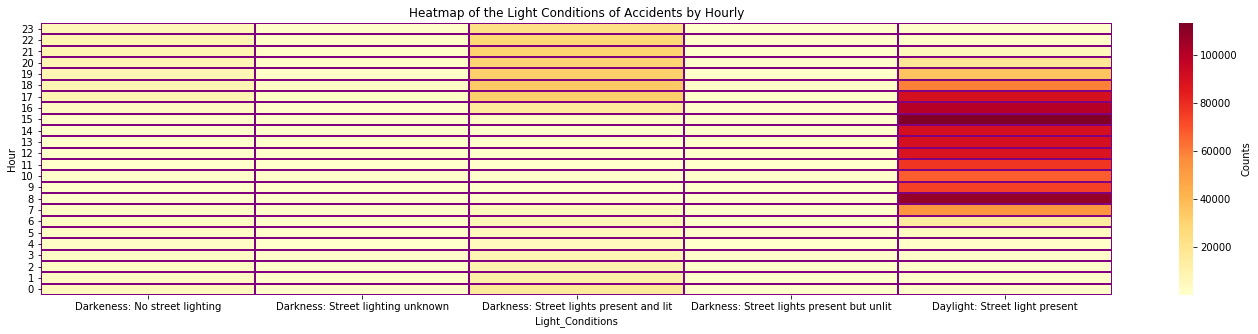

In [40]:
plt.figure(figsize=(24,5))
dftest6 = pd.DataFrame(data, columns=['Hour','Light_Conditions','Accident_Index'])
test6 = dftest6.groupby(['Hour', 'Light_Conditions'])['Accident_Index'].count().to_frame().reset_index()
pt6 = test6.pivot(index = 'Hour', columns = 'Light_Conditions', values = 'Accident_Index')
pt6 = pt6.sort_index(ascending=False)
h6 = sns.heatmap(pt6, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h6.set_title('Heatmap of the Light Conditions of Accidents by Hourly')
#figh6 = h6.get_figure()
#figh6.savefig('Heatmap of the Light Conditions of Accidents.png')

Text(0.5,1,'Heatmap of the Weather Conditions of Accidents by Hourly')

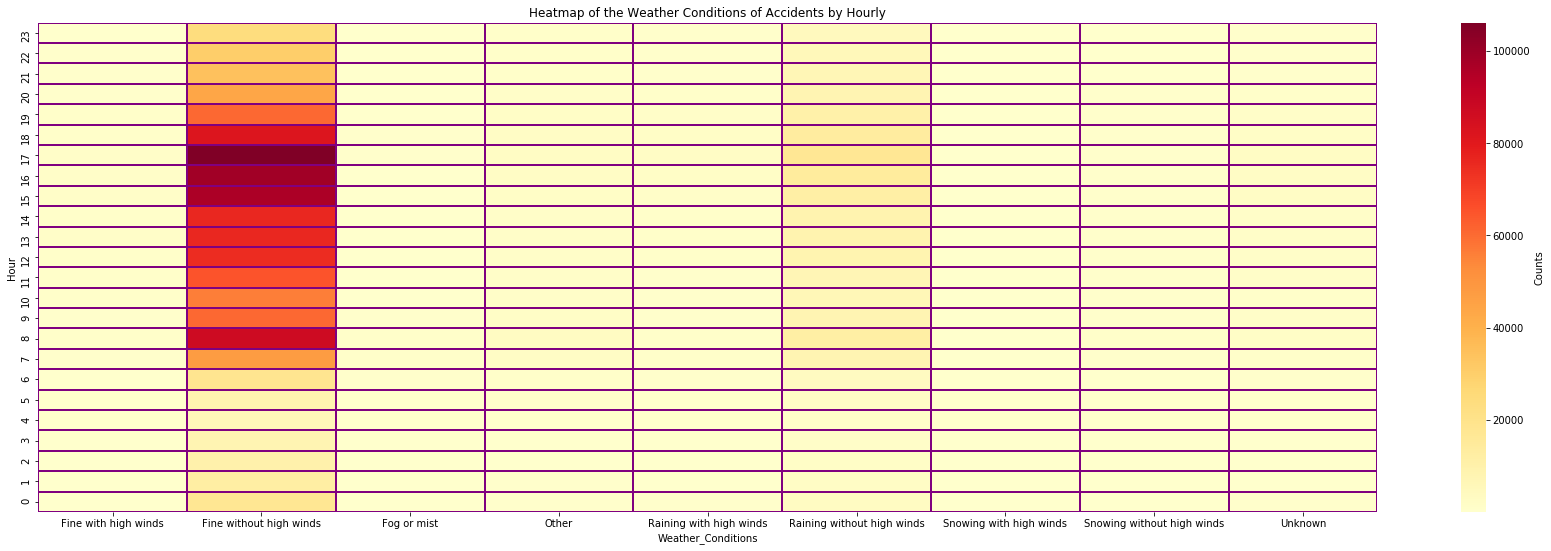

In [41]:
plt.figure(figsize=(30,9))
dftest7 = pd.DataFrame(data, columns=['Hour','Weather_Conditions','Accident_Index'])
test7 = dftest7.groupby(['Hour', 'Weather_Conditions'])['Accident_Index'].count().to_frame().reset_index()
pt7 = test7.pivot(index = 'Hour', columns = 'Weather_Conditions', values = 'Accident_Index')
pt7 = pt7.sort_index(ascending=False)
h7 = sns.heatmap(pt7, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h7.set_title('Heatmap of the Weather Conditions of Accidents by Hourly')
#figh7 = h7.get_figure()
#figh7.savefig('Heatmap of Weather Conditions of Accidents.png')

Text(0.5,1,'Heatmap of the Junction Control of Accidents by Hourly')

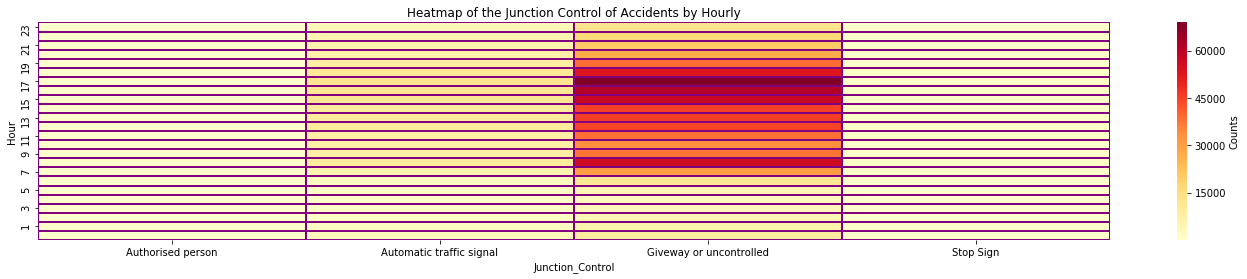

In [42]:
plt.figure(figsize=(24,4))
dftest8 = pd.DataFrame(data, columns=['Hour','Junction_Control','Accident_Index'])
test8 = dftest8.groupby(['Hour', 'Junction_Control'])['Accident_Index'].count().to_frame().reset_index()
pt8 = test8.pivot(index = 'Hour', columns = 'Junction_Control', values = 'Accident_Index')
pt8 = pt8.sort_index(ascending=False)
h8 = sns.heatmap(pt8, cmap='YlOrRd', linewidths=1, linecolor='Purple',cbar_kws={'label':'Counts'})
h8.set_title('Heatmap of the Junction Control of Accidents by Hourly')
#figh8 = h8.get_figure()
#figh8.savefig('Heatmap of Junction Control of Accidents.png')